In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText
import csv
import pylab as pl
import numpy as np
import config_constants as cc

In [2]:
# Load data and add column names
folder = '.\Results\AutoXYTest_20230412_162656'
name = '\AutoXYTest_20230412_162656\FullList'
winlist = '\AutoXYTest_20230412_162656\WinList'
losslist = '\AutoXYTest_20230412_162656\LossList'
headers = ['X (mm)', 'Y (mm)']
data = pd.read_csv('.\Results\%s.csv' %name, names=headers) #select your file
wins = pd.read_csv('.\Results\%s.csv' %winlist, names=headers) #select your file
losses = pd.read_csv('.\Results\%s.csv' %losslist, names=headers) #select your file
#start = pd.read_csv('.\Results\AutoXYTest_20230116_164712.csv', names=headers, skiprows=lambda x: (x != 0) and not x % 2)
#start = data.iloc[::2, :]
#destination = pd.read_csv('.\Results\pre_20230113_145250.csv', nrows=1, names=headers) #select your file
destination = data.iloc[1::2, :]
#end = pd.read_csv('.\Results\AutoXYTest_20230116_164712.csv', names=headers, skiprows=lambda x: x % 2)
#end = data.iloc[2::2, :]
moves = data.iloc[0::2, :]

In [3]:
print(moves)
print(destination)

         X (mm)     Y (mm)
0     15.305446  11.945040
2     12.597403  12.113750
4     12.730513  12.015961
6     12.728231  11.941222
8     12.722122  11.922437
...         ...        ...
1102  15.628708  10.021093
1104  15.618870  10.011514
1106  15.622239   9.997126
1108  15.627488   9.993568
1110  15.631427   9.987445

[556 rows x 2 columns]
         X (mm)     Y (mm)
1     12.710588  11.909995
3     12.710588  11.909995
5     12.710588  11.909995
7     12.710588  11.909995
9     12.710588  11.909995
...         ...        ...
1101  15.624562   9.983397
1103  15.624562   9.983397
1105  15.624562   9.983397
1107  15.624562   9.983397
1109  15.624562   9.983397

[555 rows x 2 columns]


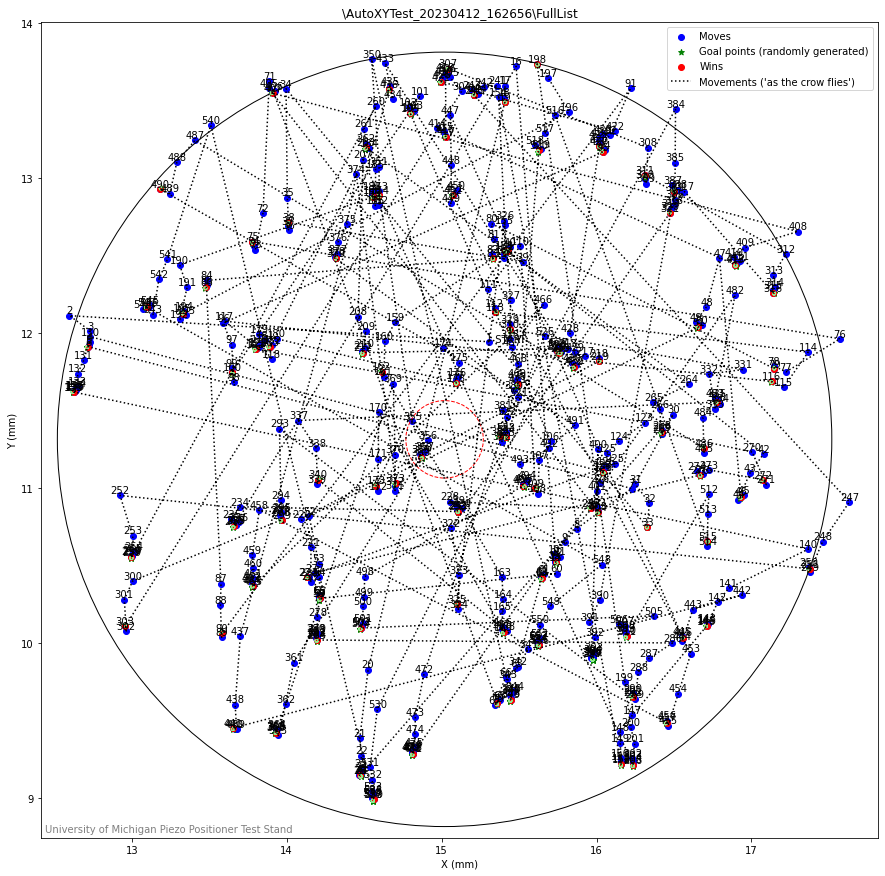

In [4]:
# Plot
steps = list(range(1,len(moves['X (mm)']) +1))
#print(steps)
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
plt.scatter(moves['X (mm)'], moves['Y (mm)'],color='blue',label="Moves")
plt.scatter(destination['X (mm)'], destination['Y (mm)'],c='green',label="Goal points (randomly generated)",marker = '*')
plt.scatter(wins['X (mm)'], wins['Y (mm)'],c='red',label="Wins",marker = 'o')
#for (xi, yi, i) in zip(destination['X (mm)'], destination['Y (mm)'],steps):
    #plt.text(xi, yi, i, va='bottom', ha='center')
#plt.scatter(end['X (mm)'], end['Y (mm)'],color='blue',label="Ending points")
for (xi, yi, i) in zip(moves['X (mm)'], moves['Y (mm)'],steps):
    plt.text(xi, yi, i, va='bottom', ha='center')
    
circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )

#print(list(range(1,len(destination['X (mm)']) +1)))

data_index1 = destination.index.tolist()
for i in data_index1:
    circle = plt.Circle( (destination['X (mm)'][i] , destination['Y (mm)'][i]), 0.01 , fill = False, color = 'lightgreen', linestyle = '-')
    ax.add_artist( circle )
    

plt.text(data['X (mm)'][0],data['Y (mm)'][0],'  START',size = 10)
#plt.text(end['X (mm)'][-1:],end['Y (mm)'][-1:],'  END',size = 10)
plt.plot(moves['X (mm)'],moves['Y (mm)'],color = 'black', linestyle = ':',label="Movements ('as the crow flies')" )

#endx = end['X (mm)'].tolist()
#endy = end['Y (mm)'].tolist()
#destx = destination['X (mm)'].tolist()
#desty = destination['Y (mm)'].tolist()

#xdiffs = np.subtract(destx, endx)
#xerror = list(xdiffs)

#ydiffs = np.subtract(desty, endy)
#yerror = list(ydiffs)


#plt.quiver(end['X (mm)'], end['Y (mm)'], xerror, yerror, scale_units ='xy', scale = 1, width=.002,color='orange',label="Error")

ab = AnchoredText("University of Michigan Piezo Positioner Test Stand", loc="lower left", frameon=False, borderpad=0, prop=dict(alpha=0.5), )
ab.set_zorder(0)
ax.add_artist(ab)

plt.title(name)
plt.axis('equal')
plt.xlim()
plt.ylim()
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend(loc='upper right')
plt.savefig(folder + '\FullPlot')
plt.show()

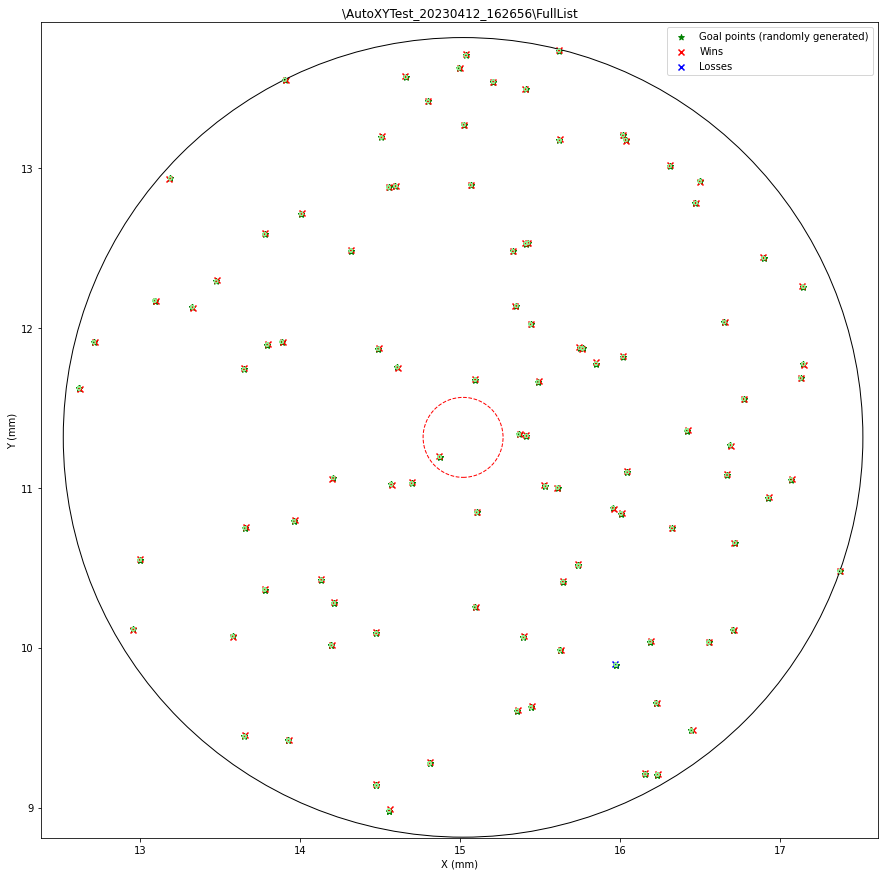

In [10]:
# Plot
steps = list(range(1,len(moves['X (mm)']) +1))
#print(steps)
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
#plt.scatter(moves['X (mm)'], moves['Y (mm)'],color='blue',label="Moves")
plt.scatter(destination['X (mm)'], destination['Y (mm)'],c='green',label="Goal points (randomly generated)",marker = '*')
plt.scatter(wins['X (mm)'], wins['Y (mm)'],c='red',label="Wins",marker = 'x')
plt.scatter(losses['X (mm)'], losses['Y (mm)'],c='blue',label="Losses",marker = 'x')

circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )


#print(len(wins['X (mm)']),'/',len(wins['X (mm)'])+len(losses['X (mm)'])) #put in the number of points assigned

data_index1 = destination.index.tolist()
for i in data_index1:
    circle = plt.Circle( (destination['X (mm)'][i] , destination['Y (mm)'][i]), 0.01 , fill = False, color = 'lightgreen', linestyle = '-')
    ax.add_artist( circle )


plt.title(name)
plt.axis('equal')
plt.xlim()
plt.ylim()
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend(loc='best')
plt.savefig(folder + '\CoordsOnly')
plt.show()